In [2]:
%reload_ext autoreload
%autoreload 2
    
from active_learning import *
from concept import *
from util import performance_curve_difference
from itertools import combinations

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
task = np.identity(10)
perf_eig = average_performance(task, method='eig')
perf_st = average_performance(task, method='self-teach')
perf_rand = average_performance(task, method='random')
perf_epg = average_performance(task, method='epg')

/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/active_learning.py:99: RuntimeWarning: invalid value encountered in true_divide
  score = full_post*teacher_prior*rep_prior/rep_z


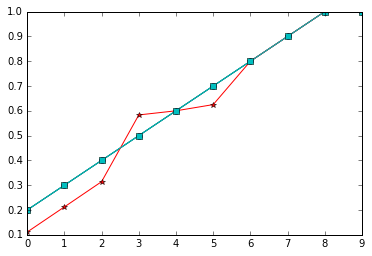

In [6]:
plt.plot(perf_eig, '-o')
plt.hold(True)
plt.plot(perf_st, '-x')
plt.plot(perf_rand, '-*')
plt.plot(perf_epg, '-s')

Reproduce Table 1 row 1 of Nelson's paper "Experience Matters: Information Acquisition Optimizes Probability Gain"
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2926803/pdf/nihms227105.pdf

In [7]:
concept_space = np.array([[0, 0.57],[0.24, 0]])

In [10]:
likelihood = np.zeros([2, 2, 2])
likelihood[:,:,0] = concept_space
likelihood[:,:,1] = 1 - concept_space

In [11]:
likelihood

array([[[0.  , 1.  ],
        [0.57, 0.43]],

       [[0.24, 0.76],
        [0.  , 1.  ]]])

In [12]:
prior = np.array([0.7, 0.3])

In [13]:
expected_probability_gain(likelihood, prior)

array([7.20000000e-02, 2.77555756e-17])

Success!

In [14]:
expected_information_gain(likelihood, prior)

/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(vec*np.log(vec))
/Users/CoDaS/Dropbox/ShaftoLab/is-it-optimal/util.py:19: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(vec*np.log(vec))


array([0.09345789, 0.19428368])

EIG is not the same as the paper though. The paper has: 0.135